## **Caso: Seguro de Vida**

<img src="https://www.bbva.com/wp-content/uploads/2017/05/Seguros-vida-BBVA.jpg" alt="drawing" width="500"/>
<br>

##### Alumno : Diego Flores Ihuaraqui 

## Suscripción de clientes al programa de seguro con Regresión Logística
El gerente de la empresa desea analizar a sus posibles clientes a través de suscripciones, es decir, desea evaluar si un determinado cliente se suscribirá o no al programa de seguro. Para ello estudia diferentes variables con la intención de identificar cuáles son determinantes para que una persona adquiera o no el seguro.

Importaremos la librerias a utilizar :

In [1]:
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">Sobre el archivo de datos</h2>

Seguro VIDA.SA, es una empresa con más de 30 años en el mercado y con más de 1 millón de clientes en el Perú. Esta empresa nació para satisfacer diversas necesidades de protección, bajo el lema “estamos convencidos de que ya no solo se trata de proteger, se trata de evolucionar, aprendiendo a controlar los riesgos”. Entre los principales seguros que brinda la empresa se encuentra los seguros de vida.


Entre las variables a evaluar considera las siguientes:
- Seguro: Si la persona cuenta o no con seguro (1 = Sí, 0 = No)
- Edad: Edad de la persona ( en años)
- Sexo: Sexo de la persona ( 1= Masculino, 0 = Femenino)
- Hijos: Número de hijos
- Ingresos: Ingresos mensuales (en soles)
- Antigüedad: Antigüedad de la persona en su empresa de trabajo (en años)
- Automóvil:  Si la persona cuenta con automóvil (1= si tiene, 0= no tiene)


# ANALISIS EXPLORATORIO

La visualización de datos es clave en el análisis de datos y la ciencia, ya que ayuda a detectar sesgos, valores atípicos, etc. Permite visualizar nuestros datos y ver qué podemos obtener de esto.

Data: https://raw.githubusercontent.com/Schrodingerdf/Data/main/Vida_data2.txt

### Carga de la data 

In [2]:
url = 'https://raw.githubusercontent.com/Schrodingerdf/Data/main/Vida_data2.txt'
vida = pd.read_csv(url,sep='\t')
vida.head()

,Persona,Sexo,Edad,Antigüedad,Hijos,Ingresos,Automóvil,Seguro
0,1,1,59,1,3,1821,1,0
1,2,0,26,5,4,2352,1,1
2,3,0,54,2,3,1805,1,0
3,4,1,43,4,3,1351,1,0
4,5,0,55,3,5,869,1,0


### Estadistica descriptiva

In [3]:
vida.describe().T

,count,mean,std,min,25%,50%,75%,max
Persona,699.0,350.000000,201.928205,1.0,175.5,350.0,524.5,699.0
Sexo,699.0,0.470672,0.499497,0.0,0.0,0.0,1.0,1.0
Edad,699.0,44.175966,11.923548,24.0,34.0,44.0,55.0,64.0
Antigüedad,699.0,3.519313,1.725624,1.0,2.0,3.0,5.0,6.0
Hijos,699.0,2.484979,1.675969,0.0,1.0,2.0,4.0,5.0
Ingresos,699.0,2443.193133,875.476915,867.0,1713.0,2449.0,3196.5,3999.0
Automóvil,699.0,0.559371,0.496818,0.0,0.0,1.0,1.0,1.0
Seguro,699.0,0.642346,0.479653,0.0,0.0,1.0,1.0,1.0


### Se mostrará los resultados de los gráficos con alta influencia en nuestra variable dependiente.

In [4]:
# Resumen de estadística descriptiva de la variable seguro:
vida['Seguro'].describe()

count    699.000000
mean       0.642346
std        0.479653
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Seguro, dtype: float64

Porcentaje de asegurados :  64.2346208869814
Porcentaje de No asegurados :  35.7653791130186


Text(0.5, 1.0, 'Seguro')

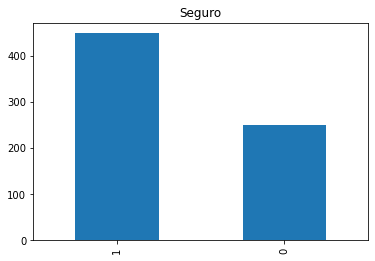

In [42]:
vida['Seguro'] = vida['Seguro'].astype(int) 
No =len(vida[vida['Seguro']==0])
Si=len(vida[vida['Seguro']==1])
porcentaje_No=(No/len(vida['Seguro']))*100
porcentaje_Si=(Si/len(vida['Seguro']))*100
print('Porcentaje de asegurados : ',porcentaje_Si)
print('Porcentaje de No asegurados : ',porcentaje_No)
vida['Seguro'].value_counts().plot.bar()
plt.title('Seguro')

Se observa que el 64.23% de los clientes se encuentran asegurados, mientras que el 35.76% no lo estan .


Seguro,0,1
Sexo,,
0,143,227
1,107,222


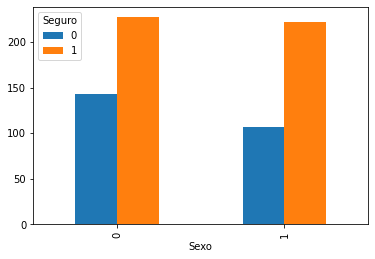

In [43]:
pd.crosstab(vida['Sexo'],vida.Seguro).plot(kind ='bar')
pd.crosstab(vida['Sexo'],vida.Seguro)

Seguro,0,1
Hijos,,
0,37,73
1,38,80
2,47,79
3,54,72
4,32,74
5,42,71


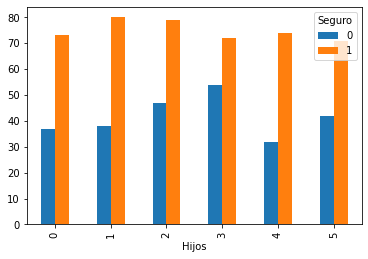

In [44]:
pd.crosstab(vida['Hijos'],vida.Seguro).plot(kind ='bar')
pd.crosstab(vida['Hijos'],vida.Seguro)

El numero de hijos tambien puede influir en el resultado final de la varaible dependiente,no se puede ver a simple vista si el numero de hijos influira en el modelo.

Seguro,0,1
Automóvil,,
0,104,204
1,146,245


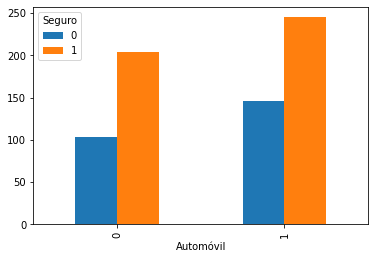

In [45]:
pd.crosstab(vida['Automóvil'],vida.Seguro).plot(kind ='bar')
pd.crosstab(vida['Automóvil'],vida.Seguro)

La posesion de un automovil puede influir en el resultado final de la variable dependiente.Se observa que los usuarios con automovil representan el mayor porcentaje de asegurados.

<AxesSubplot:xlabel='Ingresos'>

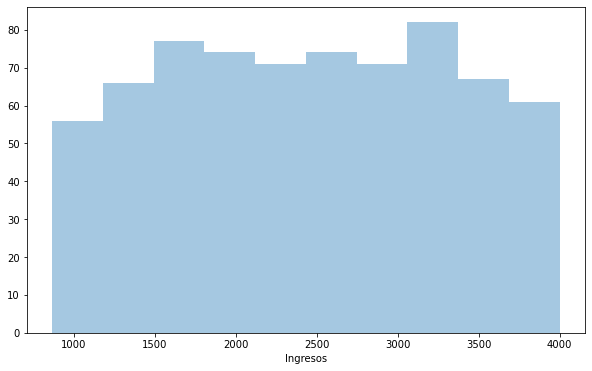

In [33]:
plt.figure(figsize =(10,6))
sns.distplot(a=vida['Ingresos'],kde=False)

A partir de la gráfica de distribución anterior sobre nuestra variable independiente 'ingresos', podemos decir que la mayoría de los usuarios tienen ingresos entre 3000 y 3500 soles.

# CREACION DEL MODELO

<h2 id="preprocessing">Pre-procesamiento y selección de la data</h2>

In [10]:
vida_df=vida[['Sexo','Edad','Antigüedad','Hijos','Ingresos'	,'Automóvil','Seguro']]
vida_df.head()

,Sexo,Edad,Antigüedad,Hijos,Ingresos,Automóvil,Seguro
0,1,59,1,3,1821,1,0
1,0,26,5,4,2352,1,1
2,0,54,2,3,1805,1,0
3,1,43,4,3,1351,1,0
4,0,55,3,5,869,1,0


In [11]:
vida_df.shape

(699, 7)

Vamos a definir <b>X</b>, e <b>y</b> para nuestro conjunto de datos:

In [35]:
X = np.asarray(vida_df[['Sexo','Edad','Antigüedad','Hijos','Ingresos','Automóvil']])
X[0:10]

array([[   1,   59,    1,    3, 1821,    1],
       [   0,   26,    5,    4, 2352,    1],
       [   0,   54,    2,    3, 1805,    1],
       [   1,   43,    4,    3, 1351,    1],
       [   0,   55,    3,    5,  869,    1],
       [   1,   56,    2,    4, 1726,    1],
       [   1,   41,    4,    4, 2513,    0],
       [   0,   35,    1,    3, 1217,    1],
       [   1,   53,    6,    1, 1672,    1],
       [   0,   52,    1,    1, 3136,    1]], dtype=int64)

In [13]:
y = np.asarray(vida_df['Seguro'])
y [0:5]

array([0, 1, 0, 0, 0])

Además, nosotros normalizamos el conjunto de datos:

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.06048105,  1.24414725, -1.46098876,  0.30751781, -0.71119942,
         0.88753805],
       [-0.94296829, -1.52546717,  0.85867312,  0.90461488, -0.10423854,
         0.88753805],
       [-0.94296829,  0.8245087 , -0.88107329,  0.30751781, -0.72948826,
         0.88753805],
       [ 1.06048105, -0.0986961 ,  0.27875765,  0.30751781, -1.24843409,
         0.88753805],
       [-0.94296829,  0.90843641, -0.30115782,  1.50171196, -1.79938539,
         0.88753805]])

## Conjunto de datos Train/Test

Dividimos nuestro conjunto de datos en un conjunto de entrenamiento y de prueba:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (559, 6) (559,)
Test set: (140, 6) (140,)


<h2 id="modeling">Modelando (Regresión Logística con Scikit-learn)</h2>
Vamos a construir nuestro modelo usando __LogisticRegression__ del paquete Scikit-learn.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Los coeficientes resultantes del análisis de regresión:

In [18]:
print(['Sexo','Edad','Antigüedad','Hijos','Ingresos'	,'Automóvil'])
LR.coef_

['Sexo', 'Edad', 'Antigüedad', 'Hijos', 'Ingresos', 'Automóvil']


array([[ 0.03782237, -0.08256713,  0.00330284, -0.00538627,  1.01309235,
        -0.030449  ]])

#### Ahora nosotros podemos predecir con nuestro data de prueba:

In [19]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1])

#### La primera columna es la probabilidad de la clase 1, P(Y=1|X), y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.27509367, 0.72490633],
       [0.67949768, 0.32050232],
       [0.47209746, 0.52790254],
       [0.34278012, 0.65721988],
       [0.29564166, 0.70435834],
       [0.65215668, 0.34784332],
       [0.77358718, 0.22641282],
       [0.1313638 , 0.8686362 ],
       [0.23767619, 0.76232381],
       [0.24613594, 0.75386406],
       [0.29390421, 0.70609579],
       [0.72942751, 0.27057249],
       [0.71297888, 0.28702112],
       [0.42405795, 0.57594205],
       [0.7665309 , 0.2334691 ],
       [0.2020567 , 0.7979433 ],
       [0.42854239, 0.57145761],
       [0.35579622, 0.64420378],
       [0.43921567, 0.56078433],
       [0.44986065, 0.55013935],
       [0.78203972, 0.21796028],
       [0.32937326, 0.67062674],
       [0.71419901, 0.28580099],
       [0.41228258, 0.58771742],
       [0.60778209, 0.39221791],
       [0.54435977, 0.45564023],
       [0.33573301, 0.66426699],
       [0.35757189, 0.64242811],
       [0.14847071, 0.85152929],
       [0.64749916, 0.35250084],
       [0.

<h2 id="evaluation">Evaluación</h2>

### Matriz de confusión

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[83  5]
 [ 1 51]]


Confusion matrix, without normalization
[[83  5]
 [ 1 51]]


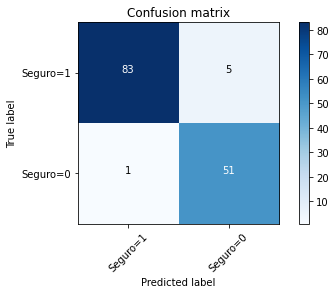

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Seguro=1','Seguro=0'],normalize= False,  title='Confusion matrix')

La primera fila es para clientes que cuentan con el seguro en el conjunto de prueba es 1.
Como podemos calcular, de 140 clientes, el valor del seguro  de 88 de ellos es 1.
Y de estos 88, el clasificador predijo correctamente 83 de ellos como 1 y 5 de ellos como 0.

Significa que, para 83 clientes, el valor de Seguro  real era 1 en el conjunto de prueba, y el clasificador también predijo correctamente esos como 1. Sin embargo, mientras que la etiqueta real de 5 clientes era 1, el clasificador predijo aquellos como 0, lo que no es muy bueno. Podemos considerarlo como un error del modelo para la primera fila.

¿Qué pasa con los clientes con valor 0 de seguro? Veamos la segunda fila.
Parece que había 52 clientes cuyo valor de seguro era 0.


El clasificador pronosticó correctamente 51 de ellos como 0, y uno de ellos erróneamente como 1. Por lo tanto, ha hecho un buen trabajo al predecir a los clientes con un valor 0 de seguro. 

In [23]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.99      0.94      0.97        88

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



Podemos decir que la precisión promedio para este clasificador es el promedio del puntaje F1 para ambas etiquetas, que es 0,96 en nuestro caso.

In [24]:
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, yhat))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, yhat))
print("Precision Score: ", metrics.precision_score(y_test, yhat))
print("Recall Score: ", metrics.recall_score(y_test, yhat))
print("F1 Score: ", metrics.f1_score(y_test, yhat))

Accuracy Score:  0.9571428571428572
Confusion Matrix:
  [[51  1]
 [ 5 83]]
Precision Score:  0.9880952380952381
Recall Score:  0.9431818181818182
F1 Score:  0.9651162790697674


### Log loss

In [25]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.37291509472750456

### AUC (curva ROC)

In [26]:
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1])

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, yhat)
auc(fpr, tpr)

0.9619755244755245

Se observa que el modelo tiene un rendimiento muy bueno para predecir si el cliente se suscribira a un seguro o no.

### Ejecutando con varios optimizadores y reguladores

In [28]:
solvers=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs=[0.01,0.02,0.05,0.1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        log_loss(y_test, yhat_prob)
        fpr, tpr, threshold = roc_curve(y_test, yhat)
        print("Solver="+s+", C="+str(c)+
              "->Accuracy: "+str(metrics.accuracy_score(y_test, yhat)) + 
             "->Log Loss : "+str(log_loss(y_test, yhat_prob)) +
             "->AUC : "+str(auc(fpr, tpr)))

Solver=newton-cg, C=0.01->Accuracy: 0.9428571428571428->Log Loss : 0.35561800211093686->AUC : 0.9230769230769231
Solver=newton-cg, C=0.02->Accuracy: 0.9642857142857143->Log Loss : 0.2853478956311908->AUC : 0.951923076923077
Solver=newton-cg, C=0.05->Accuracy: 0.9785714285714285->Log Loss : 0.2112422321500553->AUC : 0.9750874125874127
Solver=newton-cg, C=0.1->Accuracy: 0.9857142857142858->Log Loss : 0.1681753880383122->AUC : 0.9847027972027972
Solver=lbfgs, C=0.01->Accuracy: 0.9428571428571428->Log Loss : 0.3556180004176138->AUC : 0.9230769230769231
Solver=lbfgs, C=0.02->Accuracy: 0.9642857142857143->Log Loss : 0.28534790595646414->AUC : 0.951923076923077
Solver=lbfgs, C=0.05->Accuracy: 0.9785714285714285->Log Loss : 0.2112424816961377->AUC : 0.9750874125874127
Solver=lbfgs, C=0.1->Accuracy: 0.9857142857142858->Log Loss : 0.16817537875494373->AUC : 0.9847027972027972
Solver=liblinear, C=0.01->Accuracy: 0.9571428571428572->Log Loss : 0.37291509472750456->AUC : 0.9619755244755245
Solver=l